<a href="https://colab.research.google.com/github/distinctkemi/Prosper-Loan-Data-Analysis/blob/main/Prosper_loan_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I - (Dataset Exploration)



## Preliminary Wrangling


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#Surpressing warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0


In [ ]:
#Checcking the information of the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24872 entries, 0 to 24871
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           24872 non-null  object 
 1   ListingNumber                        24872 non-null  int64  
 2   ListingCreationDate                  24872 non-null  object 
 3   CreditGrade                          6315 non-null   object 
 4   Term                                 24872 non-null  int64  
 5   LoanStatus                           24872 non-null  object 
 6   ClosedDate                           11968 non-null  object 
 7   BorrowerAPR                          24870 non-null  float64
 8   BorrowerRate                         24872 non-null  float64
 9   LenderYield                          24872 non-null  float64
 10  EstimatedEffectiveYield              18534 non-null  float64
 11  EstimatedLoss               

In [ ]:
#Statistics summary of data
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,2.487200e+04,24872.000000,24870.000000,24872.000000,24872.000000,18534.000000,18534.000000,18534.000000,18534.000000,18534.000000,...,24872.000000,24872.000000,24872.000000,24871.000000,24871.000000,24871.000000,24871.000000,24871.000000,24871.000000,24871.000000
mean,6.299408e+05,40.922161,0.218140,0.192101,0.182030,0.168393,0.080006,0.095874,4.084871,5.954354,...,-55.072088,-14.518246,697.908176,677.117005,25.529917,0.998571,0.047485,0.023964,16.510878,80.404527
std,3.274556e+05,10.451773,0.080029,0.074530,0.074226,0.068113,0.046758,0.030250,1.665127,2.357758,...,61.531514,120.529103,2376.428248,2348.401153,286.962512,0.017860,0.406072,0.316528,301.131541,103.337813
min,3.600000e+01,12.000000,0.016570,0.010000,0.000000,-0.177300,0.004900,-0.177300,1.000000,1.000000,...,-553.880000,-9274.750000,0.000000,-139.140000,0.000000,0.700500,0.000000,0.000000,0.000000,1.000000
25%,4.021410e+05,36.000000,0.156290,0.133400,0.124000,0.116600,0.042400,0.074550,3.000000,4.000000,...,-73.367500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.034215e+05,36.000000,0.208080,0.182000,0.171900,0.159970,0.069900,0.091200,4.000000,6.000000,...,-34.160000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,43.000000
75%,8.963188e+05,36.000000,0.281290,0.249900,0.239900,0.223520,0.112000,0.115800,5.000000,8.000000,...,-13.810000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.462010,0.450000,0.432500,0.319900,0.366000,0.257000,7.000000,11.000000,...,9.810000,0.000000,25000.000000,25000.000000,21117.900000,1.004500,39.000000,33.000000,23699.520000,917.000000


In [ ]:
#Checking for duplicates in the dataset
loan.duplicated().sum()

0

### What is the structure of your dataset?
>There are 113,937 loans with 81 features but only few columns will be selected for the exploration.


### What is/are the main feature(s) of interest in your dataset?

> `Occupation`, `EmploymentStatus`, `BorrowerAPR`, `BorrowerRate`, `ProsperRating (numeric)`, `ProsperRating (Alpha)`, `Term`, `IncomeRange`, `DebtIncomeRation`, `BorrowerState`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Loan Status, occupation and Employment Status will probably have a some impact on loans. 

In [ ]:
# Selecting only 15 columns from the propser data for the exploration
df = loan[['LoanStatus', 'Occupation', 'EmploymentStatus', 'Term','BorrowerAPR',\
           'BorrowerRate', 'IsBorrowerHomeowner', 'LenderYield', \
           'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'LoanOriginationDate',
                         'IncomeRange', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount',
                         'MonthlyLoanPayment', 'DebtToIncomeRatio',]]
df.head()

,LoanStatus,Occupation,EmploymentStatus,Term,BorrowerAPR,BorrowerRate,IsBorrowerHomeowner,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,LoanOriginationDate,IncomeRange,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,DebtToIncomeRatio
0,Completed,Other,Self-employed,36,0.16516,0.1580,True,0.1380,NaN,NaN,0,CO,2007-09-12 00:00:00,"$25,000-49,999",0,9425,330.43,0.17
1,Current,Professional,Employed,36,0.12016,0.0920,False,0.0820,A,7.0,2,CO,2014-03-03 00:00:00,"$50,000-74,999",0,10000,318.93,0.18
2,Completed,Other,Not available,36,0.28269,0.2750,False,0.2400,NaN,NaN,0,GA,2007-01-17 00:00:00,Not displayed,0,3001,123.32,0.06
3,Current,Skilled Labor,Employed,36,0.12528,0.0974,True,0.0874,A,9.0,16,GA,2012-11-01 00:00:00,"$25,000-49,999",0,10000,321.45,0.15
4,Current,Executive,Employed,36,0.24614,0.2085,True,0.1985,D,4.0,2,MN,2013-09-20 00:00:00,"$100,000+",0,15000,563.97,0.26


In [ ]:
#Iinfo of the selected columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24872 entries, 0 to 24871
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanStatus                 24872 non-null  object 
 1   Occupation                 24094 non-null  object 
 2   EmploymentStatus           24399 non-null  object 
 3   Term                       24872 non-null  int64  
 4   BorrowerAPR                24870 non-null  float64
 5   BorrowerRate               24872 non-null  float64
 6   IsBorrowerHomeowner        24872 non-null  bool   
 7   LenderYield                24872 non-null  float64
 8   ProsperRating (Alpha)      18534 non-null  object 
 9   ProsperScore               18534 non-null  float64
 10  ListingCategory (numeric)  24872 non-null  int64  
 11  BorrowerState              23664 non-null  object 
 12  LoanOriginationDate        24872 non-null  object 
 13  IncomeRange                24872 non-null  obj

#### Data Wrangling

In [ ]:
#Checking for missing values 
df.isnull().sum()

LoanStatus                      0
Occupation                    778
EmploymentStatus              473
Term                            0
BorrowerAPR                     2
BorrowerRate                    0
IsBorrowerHomeowner             0
LenderYield                     0
ProsperRating (Alpha)        6338
ProsperScore                 6338
ListingCategory (numeric)       0
BorrowerState                1208
LoanOriginationDate             0
IncomeRange                     0
LoanCurrentDaysDelinquent       0
LoanOriginalAmount              0
MonthlyLoanPayment              0
DebtToIncomeRatio            1897
dtype: int64

> It can be observed that there are a lot of missing values in few columns and will have to be handled before exploration

In [ ]:
#Filling missing values with mode because majority of the columns are categorical

df['BorrowerAPR'] = df['BorrowerAPR'].fillna(df['BorrowerAPR'].mean())
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].fillna(df['ProsperRating (Alpha)'].mode()[0])
df['BorrowerState'] = df['BorrowerState'].fillna(df['BorrowerState'].mode()[0])
df['ProsperScore'] = df['ProsperScore'].fillna(df['ProsperScore'].mode()[0])
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['DebtToIncomeRatio'] = df['DebtToIncomeRatio'].fillna(df['DebtToIncomeRatio'].median())


In [ ]:
#Confirming there are no longer missing values in the selected columns
df.isna().sum()

LoanStatus                   0
Occupation                   0
EmploymentStatus             0
Term                         0
BorrowerAPR                  0
BorrowerRate                 0
IsBorrowerHomeowner          0
LenderYield                  0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
BorrowerState                0
LoanOriginationDate          0
IncomeRange                  0
LoanCurrentDaysDelinquent    0
LoanOriginalAmount           0
MonthlyLoanPayment           0
DebtToIncomeRatio            0
dtype: int64

### Univariate Visualisation

**Plot 1**

In [ ]:
#Creating a function for giving axis titles labels
def lab(x, y, t):
    """
    xlab: x-axis title 
    ylab: y-axis title 
    title: title of plot
  
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

In [ ]:
#Plot 1: 'Term'
df['Term'].value_counts()

36    19109
60     5432
12      331
Name: Term, dtype: int64

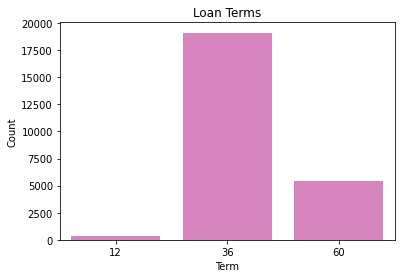

In [ ]:
#Term column visualisation
base_color = sb.color_palette()[6]
sb.countplot(data=df,x= 'Term',color=base_color);
lab('Term', 'Count', 'Loan Terms')

>  Most loan are paid back in 36 months according to the plot above

Plot 2

In [ ]:
#Occupation of loan collectors
df['Occupation'].value_counts()

Other                          7048
Professional                   2944
Computer Programmer             977
Executive                       894
Teacher                         837
                               ... 
Student - College Sophomore      11
Student - College Freshman        8
Student - Community College       6
Student - Technical School        4
Judge                             3
Name: Occupation, Length: 67, dtype: int64

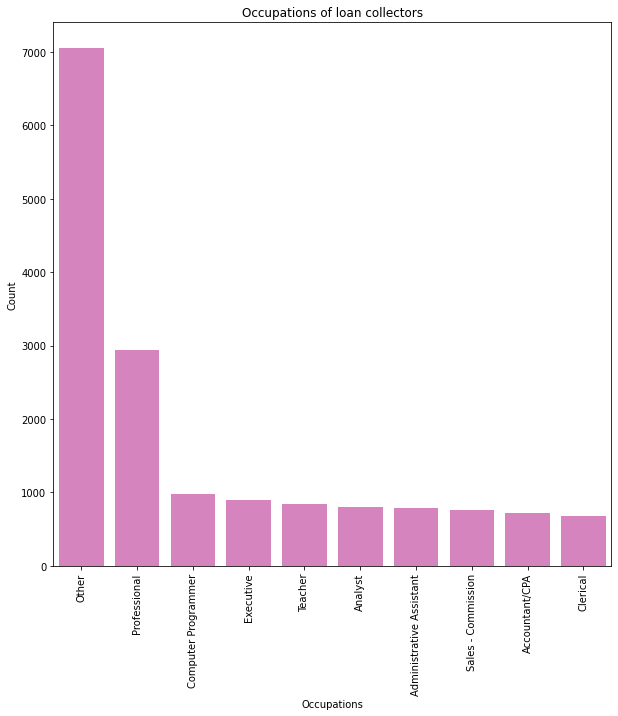

In [ ]:
#Visualisation of occupation
a =df['Occupation'].value_counts().index[0:10]
base_color = sb.color_palette()[6]
plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sb.countplot(data=df, x='Occupation',color=base_color, order = a);
lab('Occupations', 'Count', 'Occupations of loan collectors')


> Most loan collectors have their occupation under 'other' category. It can be assumed that they are not professional workers

In [ ]:
df['ListingCategory (numeric)'].value_counts()

1     12645
0      3667
7      2328
2      1689
3      1585
6       578
4       521
13      446
15      314
18      191
19      181
20      174
14      171
5       165
16       66
11       48
8        45
10       24
9        16
17        9
12        9
Name: ListingCategory (numeric), dtype: int64

In [ ]:
#Renaming the numeric in the listing category
df['ListingCategory (numeric)'].replace({0: 'Not Available', 1:'Debt Consolidation', 2: 'Home Improvement', 3: 'Business',\
                     4:'Personal Loan', 5: 'Student Use', 6: 'Auto', 7:'Other', 8:'Baby & Adoption', 9:'Boat',\
                     10:'Cosmetic', 11: 'Engagement Ring', 12:'Green loans', 13:'Household Expenses', \
                    14:'Large Purchases', 15:'Medical', 16:'Motocycle', 17:'RV', 18:'Taxes',\
                    19:'Vacation', 20:'Wedding'}, inplace=True)

**Plot 3**

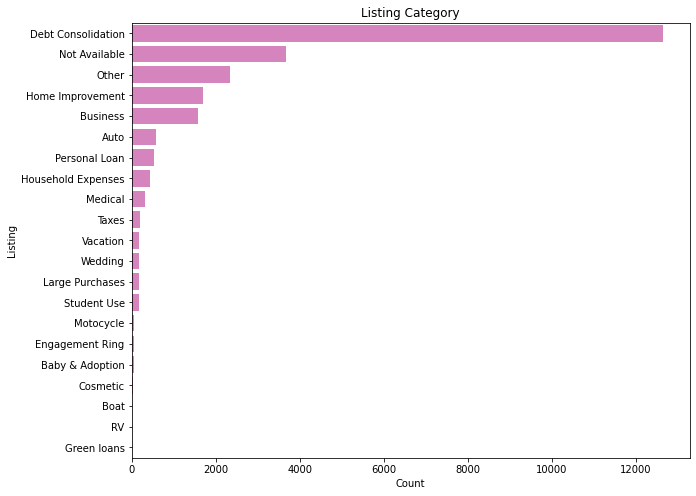

In [ ]:
#Visualising the most picked option of the listing of the reason for loan collection

l =df['ListingCategory (numeric)'].value_counts().index
base_color = sb.color_palette()[6]
plt.figure(figsize=(10,8))
sb.countplot(data=df, y='ListingCategory (numeric)',color=base_color, order = l);
lab('Count','Listing', 'Listing Category')


> Majority of the borrowers collected loan for debt consolidation

**Plot 4**

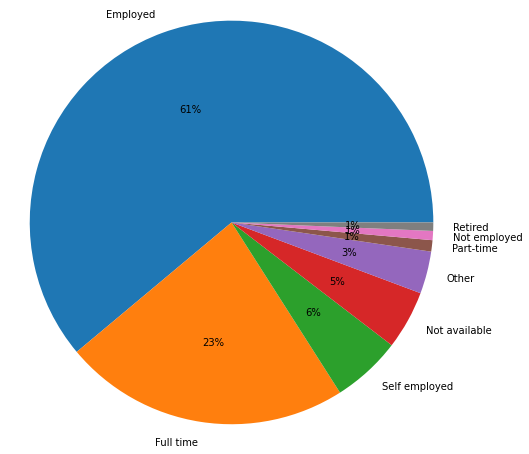

In [ ]:
#Viewing the employment status of loan collectors
s= df['EmploymentStatus'].value_counts()
fig1, ax1 = plt.subplots(figsize=(8, 8))

labels = ['Employed','Full time', 'Self employed', 'Not available', 'Other', 'Part-time', 'Not employed', 'Retired']
ax1.pie(s, labels =labels, autopct='%.0f%%' )
ax1.axis('equal')  
plt.show()

> Majority of laon collectors are employed while least collectors are retired

In [ ]:
#Income range of loan collectors 
df['IncomeRange'].value_counts()

$25,000-49,999    7062
$50,000-74,999    6840
$100,000+         3749
$75,000-99,999    3641
Not displayed     1676
$1-24,999         1606
Not employed       161
$0                 137
Name: IncomeRange, dtype: int64

**Plot 5**

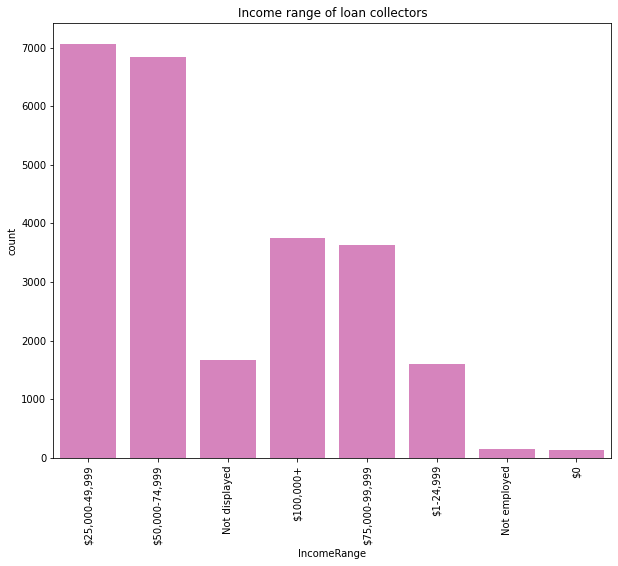

In [ ]:
#Income range of the loan collectors
plt.figure(figsize=[10, 8])
sb.countplot(data=df,x='IncomeRange',color=base_color)
plt.title('Income range of loan collectors')
plt.xticks(rotation=90);

> Most loan collectors have their income between \\$25,000 - \\$49,999

In [ ]:
df['EmploymentStatus'].value_counts()

Employed         15193
Full-time         5708
Self-employed     1382
Not available     1171
Other              843
Part-time          226
Retired            182
Not employed       167
Name: EmploymentStatus, dtype: int64

Plot 6

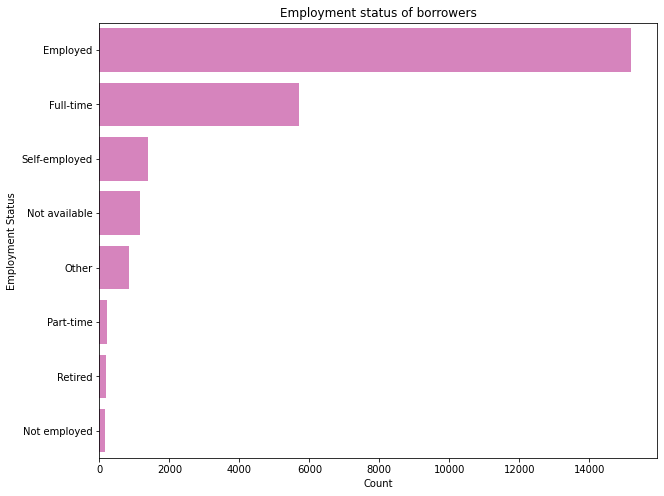

In [ ]:
#Employment status of loan collectors
status = df['EmploymentStatus'].value_counts().index
base_color = sb.color_palette()[6]
plt.figure(figsize=(10,8))
sb.countplot(data=df, y='EmploymentStatus',color=base_color, order = status);
lab('Count', 'Employment Status', 'Employment status of borrowers')

> Most loan collectors are emloyed which is logical because being employed shows that they can pay their loan back

In [ ]:
#Loan collectors that  own a home
df['IsBorrowerHomeowner'].value_counts()


True     12520
False    12352
Name: IsBorrowerHomeowner, dtype: int64

Plot 7

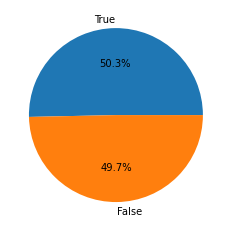

In [ ]:
#Visualising percentage of home owners

labels = ['True','False']
plt.pie(df['IsBorrowerHomeowner'].value_counts(), labels=labels, autopct='%0.1f%%')
ax1.axis('equal') 
plt.show()

> Over 50% of loan collectors own a home

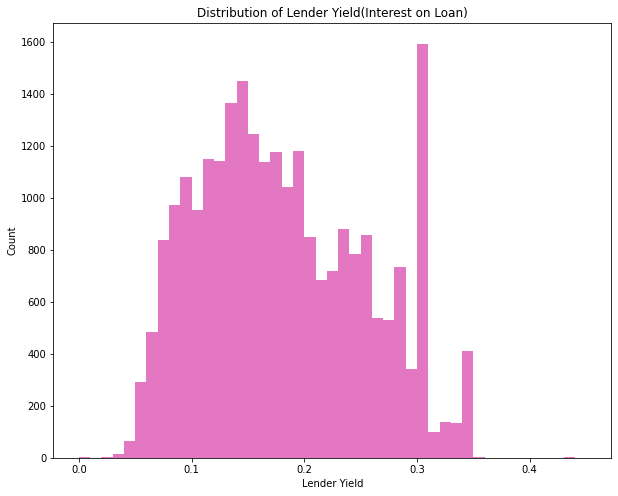

In [ ]:
# Interest rate of most loans(the Lender Yield Distribution is the interest rate column)
mini = df['LenderYield'].min()
maxi = df['LenderYield'].max()+0.01
bins = np.arange(mini, maxi +0.01, 0.01)
plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'LenderYield', bins = bins, color = base_color)
lab('Lender Yield', 'Count', 'Distribution of Lender Yield(Interest on Loan)')


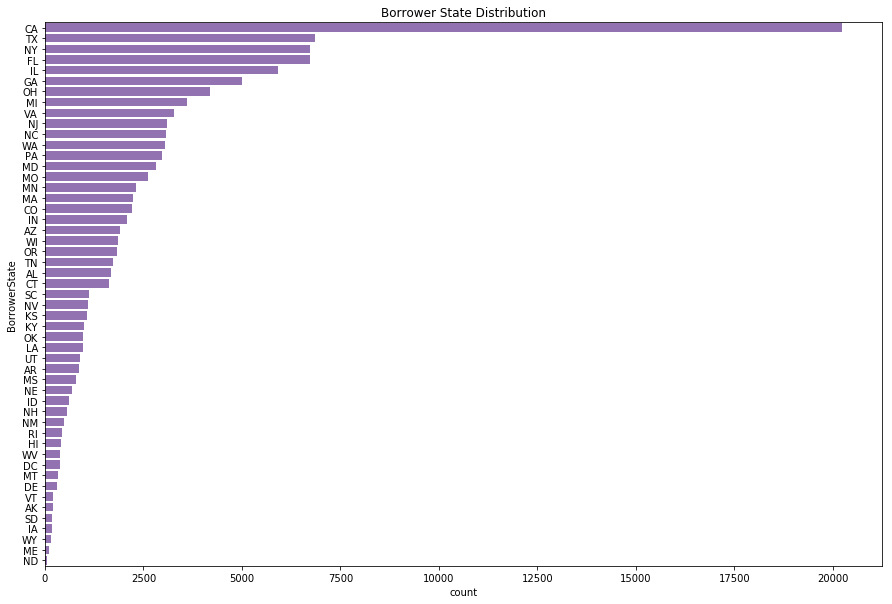

In [ ]:
#What state does most borrowers come from
order = df['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=df, y='BorrowerState',color=base_color, order=order);
plt.title('Borrower State Distribution');

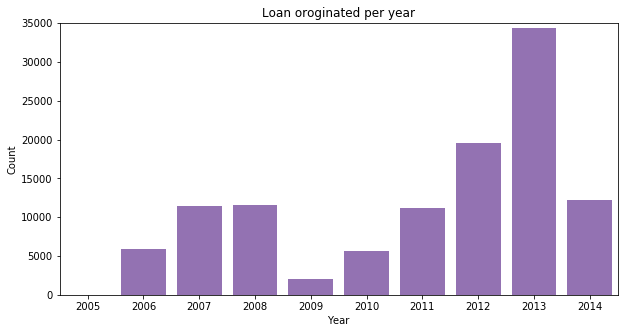

In [ ]:

#Changing the data type of the loan origination date
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

#Extracting year from the origination date
year = df['LoanOriginationDate'].dt.year
plt.figure(figsize=[10, 5])
sb.countplot(data=df, x=year, color=base_color)
plt.ylim(22, 35000)
lab('Year', 'Count', 'Loan oroginated per year');

> Loans were mostly generated in 2013 with over 34,345 loan origination and 2005 has least loan orgination wit only 22 loan orogonation

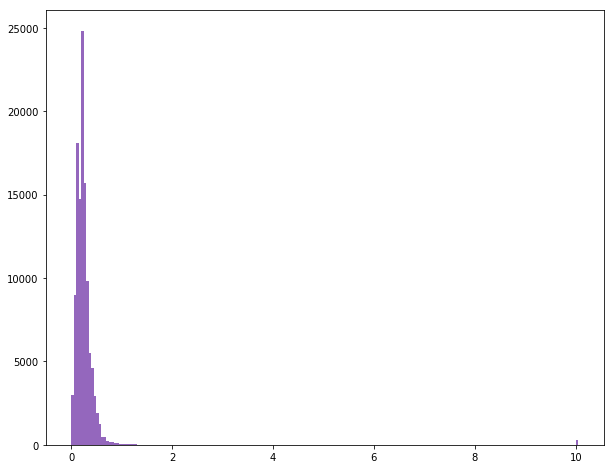

In [ ]:
bin_size = 0.05
bins=np.arange(loan_df['DebtToIncomeRatio'].min(), loan_df['DebtToIncomeRatio'].max()+bin_size, bin_size)
loan_df['DebtToIncomeRatio'].hist(bins=bins, grid = False, figsize= (10,8), color=base_color)

In [ ]:
#Question: What is the hoighest amount collected as loan
loan_df['LoanOriginalAmount'].value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
3000      5749
25000     3630
20000     3291
1000      3206
2500      2992
7500      2975
7000      2949
6000      2869
3500      2567
8000      2442
12000     1921
9000      1695
13000     1509
1500      1507
4500      1406
6500      1343
8500      1059
5500       904
11000      781
9500       675
14000      640
11500      553
18000      506
12500      455
35000      430
         ...  
9443         1
18542        1
10466        1
6564         1
6692         1
10914        1
2790         1
8995         1
6948         1
11170        1
5029         1
7268         1
5221         1
11490        1
5349         1
2345         1
7524         1
11938        1
24300        1
16160        1
5925         1
12130        1
1895         1
34679        1
2089         1
14383        1
6251         1
14447        1
6379         1
4098         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

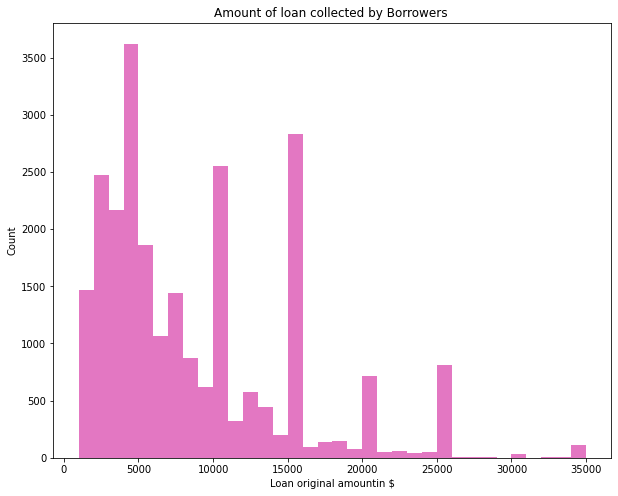

In [ ]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins, color = base_color)
lab('Loan original amountin $', 'Count', 'Amount of loan collected by Borrowers ')


> It can be observed that the distribution about is skewed to the right, lets try visualising with a log scale.

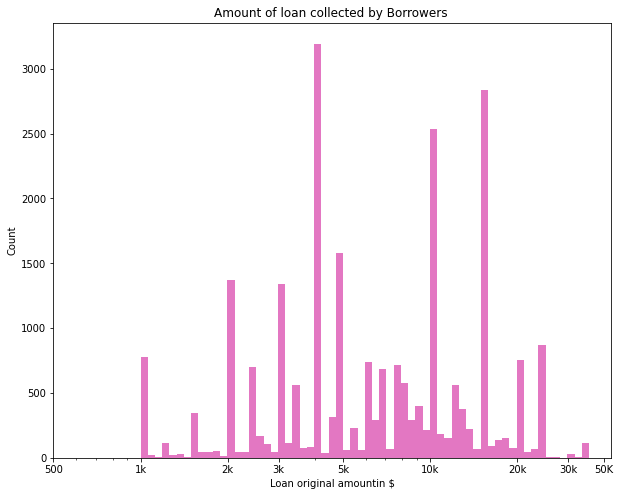

In [ ]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins, color = base_color)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 4e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
lab('Loan original amountin $', 'Count', 'Amount of loan collected by Borrowers ')

> After applying the log scale we ca see clearly now that most loan original amount is \\$4,000 followed by \\$15,000 and \\$10,000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>There were no unusual points in the columns I selected for the bivariate visualisation except for the loan original amount. 


### Bivariate Exploration

In [ ]:
#Separating the numerical variables and categorical variables
num = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield','DebtToIncomeRatio', 'ProsperScore', 
        'LoanOriginalAmount', 'MonthlyLoanPayment','LoanCurrentDaysDelinquent', 'MonthlyLoanPayment']
cat =['LoanStatus', 'ListingCategory','EmploymentStatus','Term',  'IsBorrowerHomeowner',\
          'IncomeRange', 'ProsperRating (Alpha)', 'Occupation']


In [ ]:
#Transforming loan status 
c = (df['LoanStatus'] == 'Completed') | (df['LoanStatus'] == 'Defaulted') |\
                  (df['LoanStatus'] == 'Chargedoff')
df = df[c]

def defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df['LoanStatus'] = df.apply(defaulted, axis=1)
df['LoanStatus'].value_counts()

Completed    8279
Defaulted    3688
Name: LoanStatus, dtype: int64

Plot 7

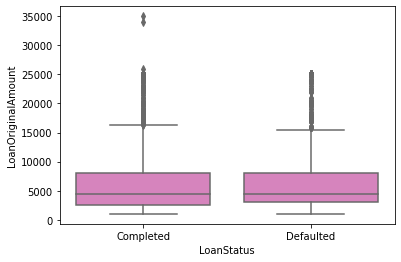

In [ ]:
#Loan Status vs Loan Original Amount
sb.boxplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);

Plot 8

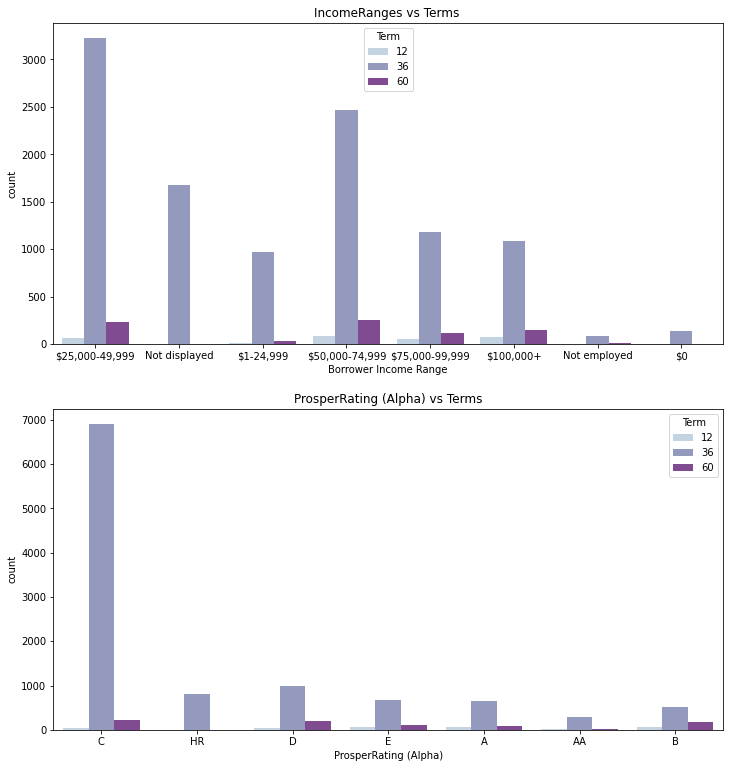

In [ ]:
#Plotting clustered bar chart for IncomeRange and Term 
plt.figure(figsize = [12,13])

#subPlot 1
plt.subplot(2, 1, 1)
sb.countplot(data = df, x = 'IncomeRange', hue = 'Term', palette = 'BuPu')
plt.title('IncomeRanges vs Terms ')
plt.xlabel('Borrower Income Range');


#subPlot 2
plt.subplot(2, 1, 2)
sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'BuPu')
plt.title('ProsperRating (Alpha) vs Terms')
plt.xlabel('ProsperRating (Alpha)');

Plot 9

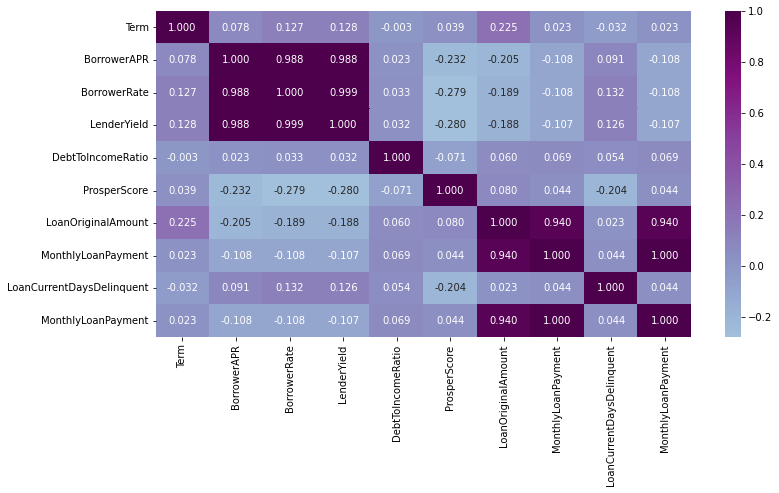

In [ ]:
#Heatmap
# pairwaise correlation plot 
cor = df[num].corr()
plt.figure(figsize = [12, 6])
sb.heatmap(cor, annot = True, fmt = '.3f', center = 0, cmap = 'BuPu')
plt.show()

>There is a strong positive relationship between the following variables:
- BorrowerRate and BorrowerAPR
- BorrowerRate and LenderYield
- LenderYield and BorrowerAPR
- LenderYield and BorrowerRate
- MonthlyloanPayment and LoanOriginalAmount

Plot 10

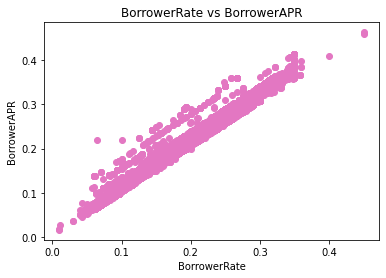

In [ ]:
#BorrowerRate and BorrowerAPR
plt.scatter(x = df['BorrowerRate'], y = df['BorrowerAPR'], color = base_color)
lab('BorrowerRate', 'BorrowerAPR',  'BorrowerRate vs BorrowerAPR')


plot 11

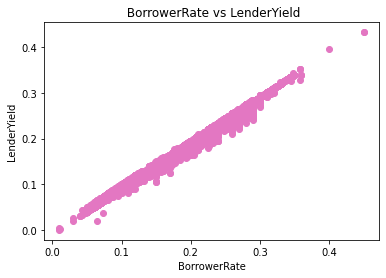

In [ ]:
#BorrowerRate and LenderYield
plt.scatter(x = df['BorrowerRate'], y = df['LenderYield'], color = base_color)
lab('BorrowerRate','LenderYield', ' BorrowerRate vs LenderYield' )

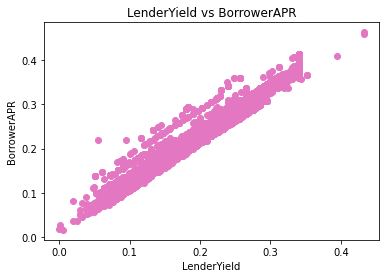

In [ ]:
#LenderYield vs BorrowerAPR
plt.scatter(x = df['LenderYield'], y = df['BorrowerAPR'], color = base_color)
lab('LenderYield', 'BorrowerAPR', 'LenderYield vs BorrowerAPR')

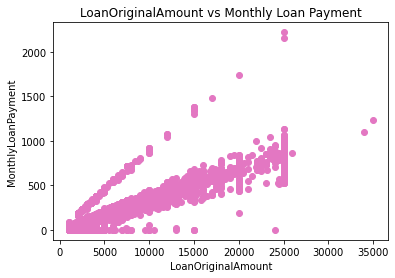

In [ ]:
#LoanOriginalAmount Vs MonthlyLoanPayment
plt.scatter(x = df['LoanOriginalAmount'], y = df['MonthlyLoanPayment'], color = base_color)
lab('LoanOriginalAmount','MonthlyLoanPayment', 'LoanOriginalAmount vs Monthly Loan Payment' )

Plot 12

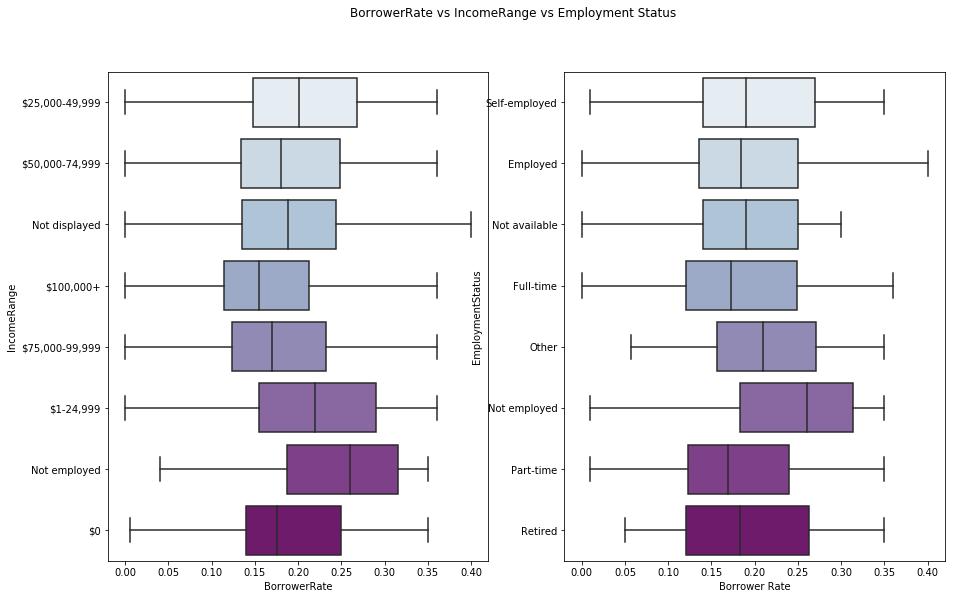

In [ ]:
# Boxplots of numeric and categorical features 

# set a larger figure size for subplots
plt.figure(figsize = [15, 9])

#Plot 1 
plt.subplot(1, 2, 1 )
# base_color = sns.color_palette()[1]
sb.boxplot(data = df, y = 'IncomeRange', x = 'BorrowerRate', palette = "BuPu", showfliers = False)
plt.ylabel('IncomeRange')
plt.xlabel('BorrowerRate')


#Plot 2
plt.subplot(1, 2, 2)
sb.boxplot(data = df, y = 'EmploymentStatus', x = 'BorrowerRate', palette = "BuPu", showfliers = False)
plt.ylabel('EmploymentStatus')
plt.xlabel('Borrower Rate')
plt.suptitle('BorrowerRate vs IncomeRange vs Employment Status')
plt.show()

> From these boxplots, it can be observed that the highest borrower rates  is on the income range of \$1-\$24,999k. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There a strong positive relationship between the following variables:

- BorrowerRate and BorrowerAPR
- BorrowerRate and LenderYield
- LenderYield and BorrowerAPR
- LenderYield and BorrowerRate
- MonthlyloanPayment and LoanOriginalAmount

 BorrowAPR and LoanOriginalAmount are negatively correlated


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Most loan collectors are employed and have the income range between \$25k - \$49k

- The loan status shows a high interest rate for past due payments, which is normal because the longer it takes to pay off the loan, the higher the interest rate. It was discovered that self-employed individuals have a higher percentage of defaulted loans than unemployed individuals, which is to be expected given that their income may not be stable because they do not earn a salary.


### Multivariate Exploration


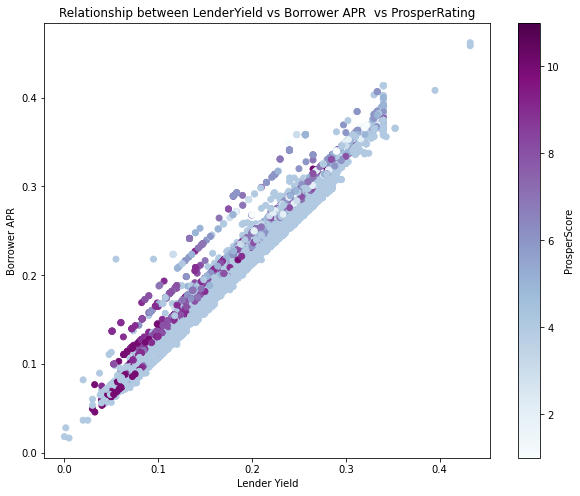

In [ ]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 8])
plt.scatter(data=df, x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'BuPu')
plt.colorbar(label = 'ProsperScore');
lab('Lender Yield', 'Borrower APR', 'LenderYield vs BorrowerAPR  vs ProsperRating' )
  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11967 entries, 0 to 24871
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanStatus                 11967 non-null  object 
 1   Occupation                 11967 non-null  object 
 2   EmploymentStatus           11967 non-null  object 
 3   Term                       11967 non-null  int64  
 4   BorrowerAPR                11967 non-null  float64
 5   BorrowerRate               11967 non-null  float64
 6   IsBorrowerHomeowner        11967 non-null  bool   
 7   LenderYield                11967 non-null  float64
 8   ProsperRating (Alpha)      11967 non-null  object 
 9   ProsperScore               11967 non-null  float64
 10  ListingCategory (numeric)  11967 non-null  object 
 11  BorrowerState              11967 non-null  object 
 12  LoanOriginationDate        11967 non-null  object 
 13  IncomeRange                11967 non-null  obj

In [ ]:
#Rating vs Term vs BorrowerAPR 

fig = plt.figure(figsize = [10,7])
sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'BuPu', dodge = 0.3, ci='sd', linestyles = '')
lab('ProsperRating (Alpha)','BorrowerAPR', 'Rating vs Term vs BorrowerAPR')


NameError: ignored

>BorrowAPR increases as the loan term increases for AA-B ratings, but for C-HR ratings, the BorrowAPR decreases as the loan term lengthens.

In [ ]:
#Transforming the loan status column
o = (loan_df['LoanStatus'] == 'Completed') | (loan_df['LoanStatus'] == 'Defaulted') |\
                  (loan_df['LoanStatus'] == 'Chargedoff')
loan_df = loan_df[o]

def transform(rows):
    if rows['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return rows['LoanStatus']
    
loan_df['LoanStatus'] = loan_df.apply(transform, axis=1)
loan_df['LoanStatus'].value_counts()

Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

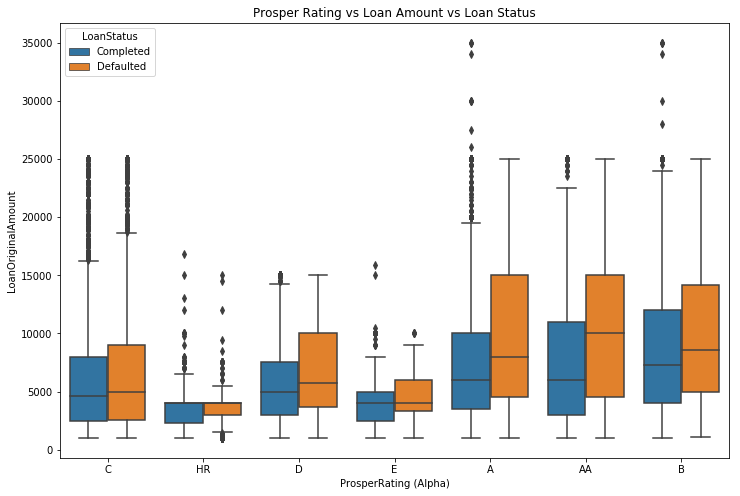

In [ ]:
#Loan Amount vs Prosper Rating
plt.figure(figsize = [12, 8])
sb.boxplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');
label('ProsperRating (Alpha)', 'LoanOriginalAmount', 'Prosper Rating vs Loan Amount vs Loan Status')

> Majority of defaulted are from people with lower prosperrating, defaulted credits are larger than completed credits.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


- Loan collectors with stronger credit score gets  high loan amounts bu lower borrowerAPRs.

- The loan amount increases as the credit rating increases, while the borrower APR decreases.

- Loan status for employed collectors varies and they have high borrow rate in past dues


### Were there any interesting or surprising interactions between features?

- BorrowerAPR and LoanOriginalAmount had a inverse relationship. The APR is typically lower for larger loan amounts.
- Scatter plots and heatmaps were also created to discover that ProsperScore and BorrowerAPR were negatively correlated, as the higher the prosper score, the lower the risk attached, and thus the lower the APR, which further lowers the yield.